In [ ]:
# Mount Drive
!unzip /content/drive/MyDrive/TransferLearnImages.zip
# rm TransferLearnImages/ -r

In [2]:
from tensorflow.keras import *

data_root = "/content/TransferLearnImages"

image_generator = preprocessing.image.ImageDataGenerator(rescale=1/255)

In [3]:
import tensorflow_hub as hub
# download model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" 

IMAGE_SIZE = 224
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), trainable=False)

# resize images for model
image_data = image_generator.flow_from_directory(str(data_root), target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 188 images belonging to 2 classes.


In [4]:
# train head with new dataset
model = Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes)
])

model.compile(
  optimizer=optimizers.Adam(),
  loss=losses.CategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

epochs = 5
history = model.fit(image_data, epochs=epochs,
                    steps_per_epoch=len(image_data))

Epoch 1/5
6/6 [==============================] - 0s 73ms/step - loss: 0.3581 - acc: 0.8564
Epoch 2/5
6/6 [==============================] - 0s 53ms/step - loss: 0.0935 - acc: 0.9894
Epoch 3/5
6/6 [==============================] - 0s 52ms/step - loss: 0.0308 - acc: 0.9947
Epoch 4/5
6/6 [==============================] - 0s 51ms/step - loss: 0.0175 - acc: 1.0000
Epoch 5/5
6/6 [==============================] - 0s 53ms/step - loss: 0.0110 - acc: 1.0000


--2020-12-03 10:45:34--  https://tennishead.net/wp-content/uploads/2019/07/Wilson-Ultra-100L-copy.jpg
Resolving tennishead.net (tennishead.net)... 35.242.177.39
Connecting to tennishead.net (tennishead.net)|35.242.177.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28199 (28K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  27.54K  --.-KB/s    in 0.08s   

2020-12-03 10:45:35 (359 KB/s) - ‘image.jpg’ saved [28199/28199]

Racket


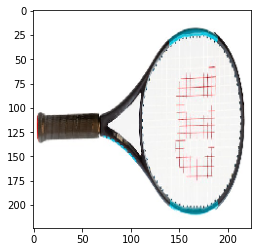

In [7]:
# test model with new image
#!wget -O image.jpg https://image.shutterstock.com/image-photo/soccer-ball-isolated-on-white-260nw-400438939.jpg
#!wget -O image.jpg https://tennishead.net/wp-content/uploads/2019/07/Wilson-Ultra-100L-copy.jpg

# process image for model
img = preprocessing.image.load_img('image.jpg',
                                   target_size=(IMAGE_SIZE, IMAGE_SIZE))
x = preprocessing.image.img_to_array(img)
x = backend.expand_dims(x, axis=0)

# display image
import matplotlib.pyplot as plt
plt.imshow(img)

# run prediction
pred = model.predict(x)
index = backend.argmax(pred)
labels = list(image_data.class_indices.keys())
print(labels[index[0]])